# TASK 2 

#  Sentiment Analysis

In [1]:
#imporint the basic libraries
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer



In [2]:
# reading the csv file 
data=pd.read_csv("Tweets.csv")

In [3]:
data.shape

(14640, 15)

In [4]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
data.isna().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [6]:
data['negativereason_gold'].value_counts()

Customer Service Issue                      12
Late Flight                                  4
Can't Tell                                   3
Cancelled Flight                             3
Cancelled Flight\nCustomer Service Issue     2
Late Flight\nFlight Attendant Complaints     1
Late Flight\nLost Luggage                    1
Bad Flight                                   1
Lost Luggage\nDamaged Luggage                1
Late Flight\nCancelled Flight                1
Flight Attendant Complaints                  1
Customer Service Issue\nLost Luggage         1
Customer Service Issue\nCan't Tell           1
Name: negativereason_gold, dtype: int64

In [7]:
data['airline_sentiment_gold'].value_counts()

negative    32
positive     5
neutral      3
Name: airline_sentiment_gold, dtype: int64

In [8]:
data['retweet_count'].value_counts()

0     13873
1       640
2        66
3        22
4        17
5         5
7         3
6         3
22        2
8         1
32        1
28        1
9         1
18        1
11        1
31        1
15        1
44        1
Name: retweet_count, dtype: int64

In [9]:
#droping the columns for cleaing the data and for reduce the null values
data.drop("negativereason_gold",axis=1,inplace=True)
data.drop("airline_sentiment_gold",axis=1,inplace=True)

In [10]:
data.drop("retweet_count",axis=1,inplace=True)

In [11]:
data.drop("tweet_coord",axis=1,inplace=True)

In [12]:
data.drop("tweet_location",axis=1,inplace=True)

In [13]:
data.drop("tweet_created",axis=1,inplace=True)

In [14]:
data.drop("user_timezone",axis=1,inplace=True)

In [15]:
data.drop("name",axis=1,inplace=True)

In [16]:
list(data.columns)

['tweet_id',
 'airline_sentiment',
 'airline_sentiment_confidence',
 'negativereason',
 'negativereason_confidence',
 'airline',
 'text']

In [17]:
sentiments = data['airline_sentiment'].unique()
sentiments

array(['neutral', 'positive', 'negative'], dtype=object)

In [18]:
neg=data[data["airline_sentiment"]=='negative']['airline_sentiment_confidence'].sum()

In [19]:
pos=data[data["airline_sentiment"]=='positive']['airline_sentiment_confidence'].sum()
neu=data[data["airline_sentiment"]=='neutral']['airline_sentiment_confidence'].sum()

In [20]:
values=[neu,pos,neg]
dr={"airline sentiment":sentiments,"count":values}
sentimentcount=pd.DataFrame(dr)
sentimentcount.head()

,airline sentiment,count
0,neutral,2551.4171
1,positive,2060.6280
2,negative,8566.4269


# DATA VISUALIZATION


Here we are finding  the count of the neutral,positive,negative for every airline and make a data frame out of it.  

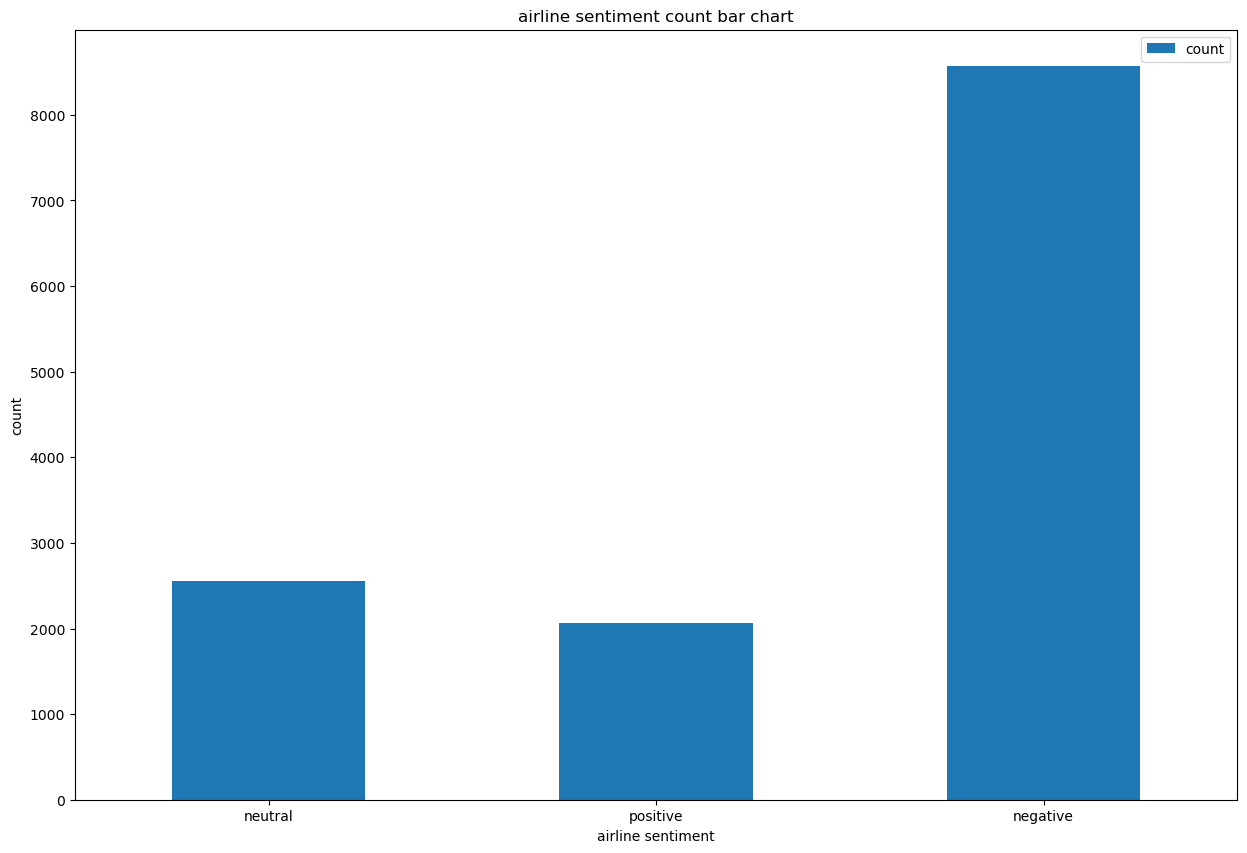

In [21]:
temp = sentimentcount.plot.bar(x='airline sentiment', y='count', rot=0, figsize=(15,10))

# Add title and axis names
plt.title('airline sentiment count bar chart')
plt.xlabel('airline sentiment')
plt.ylabel('count')
 
# Show graphic
plt.show()

In [22]:
listofairlines=data['airline'].unique()

In [23]:
listofairlines

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

In [24]:
neutralc=[]
positivec=[]
negativec=[]
totalc=[]

for airline in listofairlines:
    neuc=data.query("airline==@airline and airline_sentiment=='neutral'")['airline_sentiment_confidence'].sum()
    posc=data.query("airline==@airline and airline_sentiment=='positive'")['airline_sentiment_confidence'].sum()
    negc=data.query("airline==@airline and airline_sentiment=='negative'")['airline_sentiment_confidence'].sum()
    tt=neuc+posc+negc
    neutralc.append(neuc)
    positivec.append(posc)
    negativec.append(negc)
    totalc.append(tt)
d2=pd.DataFrame(index=listofairlines)
d2["netural count"]=neutralc
d2["positive count"]=positivec
d2["negative count"]=negativec
    
d2   

,netural count,positive count,negative count
Virgin America,143.3610,134.9727,163.2137
United,564.4000,421.1578,2457.5967
Southwest,548.5365,505.0800,1091.7521
Delta,599.5580,471.7084,861.6031
US Airways,313.1524,231.2555,2140.1501
American,382.4092,296.4536,1852.1112


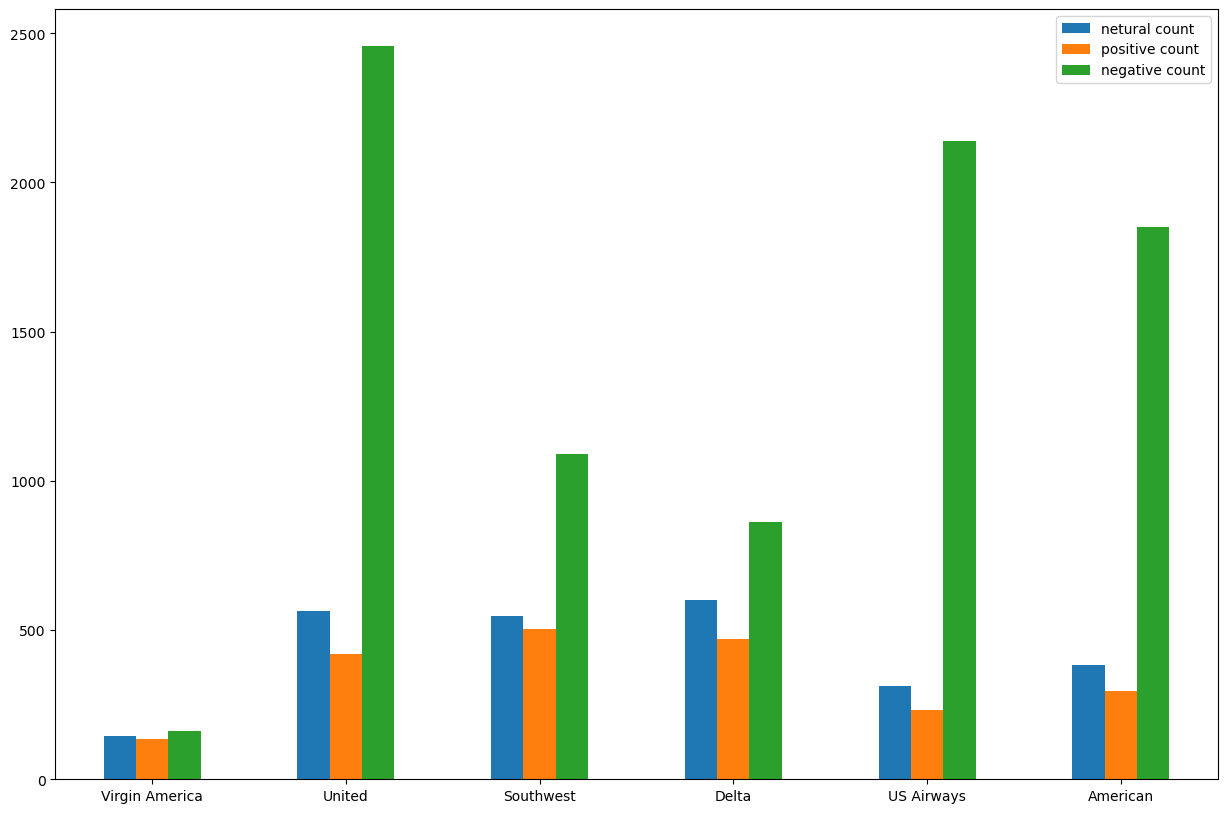

In [25]:
plt2=d2.plot.bar(rot=0,figsize=(15,10))

Text(0, 0.5, 'Count')

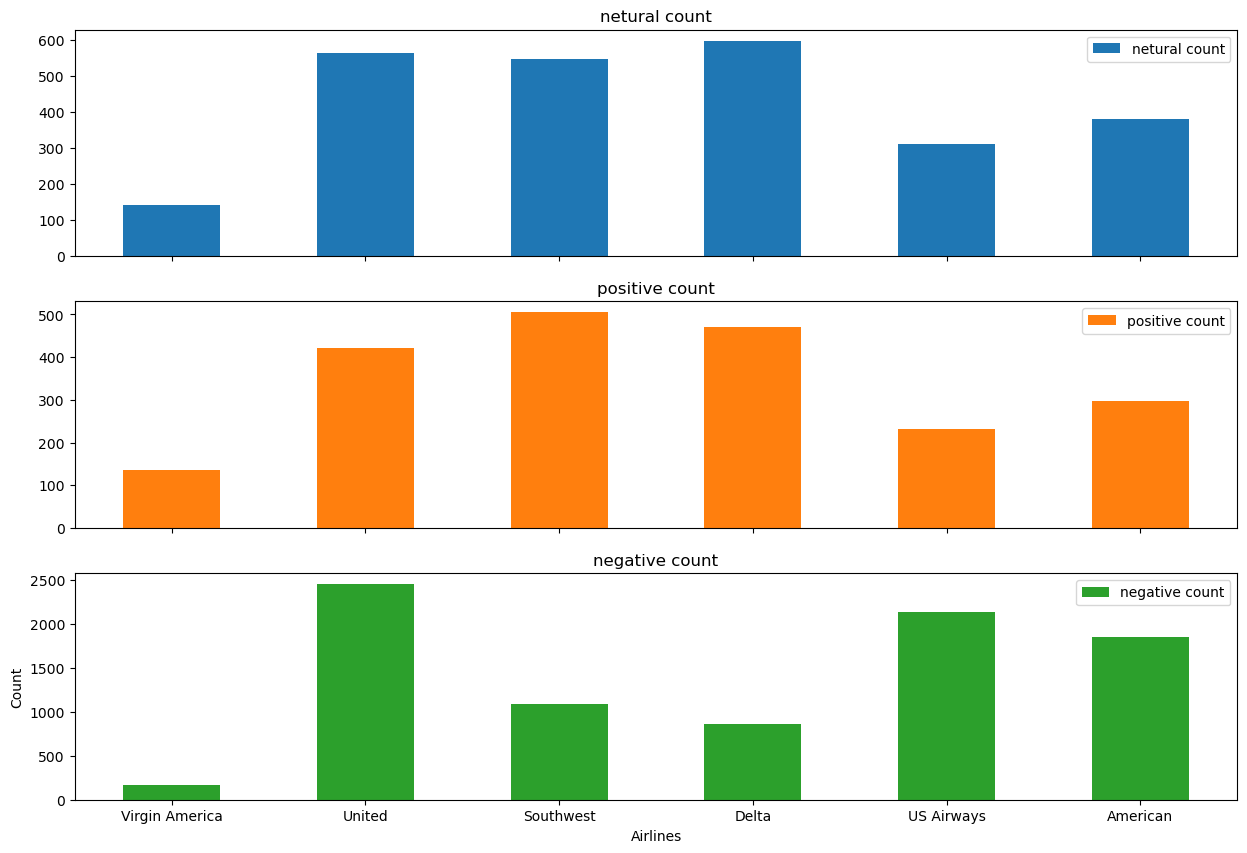

In [26]:
d2.plot.bar(rot=0,subplots=True,figsize=(15,10))
plt.xlabel('Airlines')
plt.ylabel('Count')

In [27]:
percentage_neg =[]
for neg,tt in zip(negativec,totalc):
    perc=neg/tt
    percentage_neg.append(perc)

In [28]:
d3 =pd.DataFrame(index=listofairlines)
d3['negative feedack %']=percentage_neg
d3

,negative feedack %
Virgin America,0.369640
United,0.713763
Southwest,0.508888
Delta,0.445764
US Airways,0.797208
American,0.731778


Text(0, 0.5, 'Negative feed back percentage')

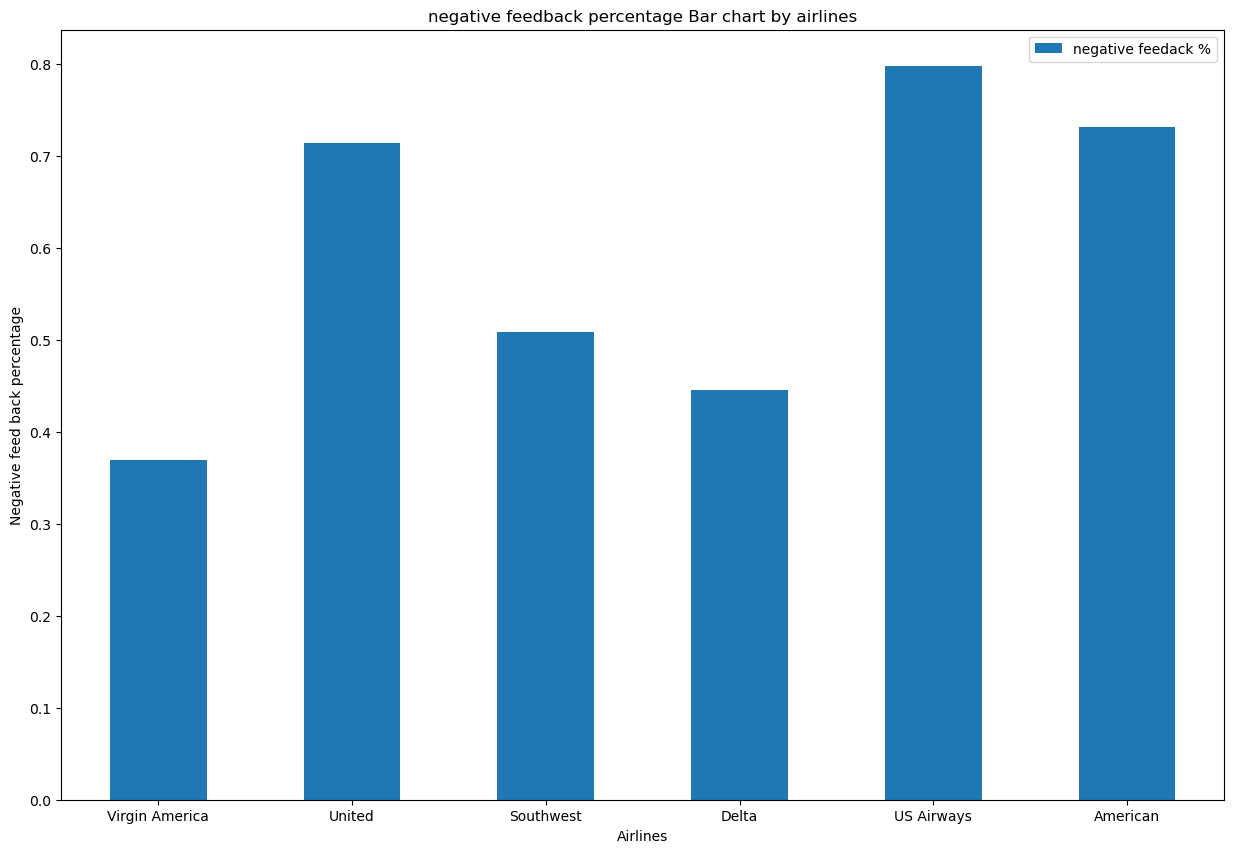

In [29]:
d3.plot.bar(rot=0,figsize=(15,10))
plt.title("negative feedback percentage Bar chart by airlines")
plt.xlabel("Airlines")
plt.ylabel("Negative feed back percentage")

# Data clearing and prosessing of text

In [30]:
import nltk
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
import re
from nltk.corpus import stopwords
corpus =[]
ps =PorterStemmer()
for i in range (len(data)):
    review =re.sub('[^a-zA-Z]','',data['text'][i])
    review =review.lower()
    review = review.split()
    review =[ps.stem(word)for word in review if not word in set (stopwords.words('english'))]
    review =' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jayesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


we use x as the indpendent variable and y is dependent veriable

In [31]:
cv= TfidfVectorizer(ngram_range=(1,2),max_features=500000)

In [32]:
x= cv.fit_transform(corpus)
y=data['airline_sentiment']
print('No. of feature_words: ', len(cv.get_feature_names_out()))

No. of feature_words:  14342


# Model training
 Here we use skitlearn library for traning the model by train test split function 

# By Logestic Regression

In [33]:
#train test split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state =0)

In [34]:
# performimg the logestic regression for training and testing  the model
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [35]:
y_pred=lr.predict(x_test)

In [36]:
# importing the matrix labaries
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
print("Confusion matrix : \n",confusion_matrix(y_pred,y_test))
print("Accuracy score : ",accuracy_score(y_pred,y_test))
print("Classification Report : \n",classification_report(y_pred,y_test))
print("-----------------------------------------------------------\n")

Confusion matrix : 
 [[2788  913  660]
 [   0    2    0]
 [   0    4   25]]
Accuracy score :  0.6409380692167578
Classification Report : 
               precision    recall  f1-score   support

    negative       1.00      0.64      0.78      4361
     neutral       0.00      1.00      0.00         2
    positive       0.04      0.86      0.07        29

    accuracy                           0.64      4392
   macro avg       0.35      0.83      0.28      4392
weighted avg       0.99      0.64      0.77      4392

-----------------------------------------------------------

